In [0]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold

class KNN:
    def __init__(self, features, labels, k=3):
        self.features = np.array(features)
        self.labels = np.array(labels)
        self.k = k
        
    def _classify(self, x):
        # Calculate x's Euclidean distance from all other samples
        diff_squared = (self.features - x) ** 2
        euclidean_distances = np.sqrt(diff_squared.sum(axis=1))
        
        # Sort index of distances --- nearest sample's index is the first element, next nearest sample's index is the second, etc.
        # We only keep the first 'K' ones
        sorted_dist_indices = euclidean_distances.argsort()[:self.k]
                
        # Count the number of classes for K nearest neighbors
        class_count = {}
        for i in sorted_dist_indices:
            vote_label = self.labels[i]
            class_count[vote_label] = class_count.get(vote_label, 0) + 1
            
        # Descending sort the resulting dictionary by class counts
        sorted_class_count = sorted(class_count.items(),
                                   key=lambda kv: (kv[1], kv[0]),
                                   reverse=True)
        
        # Return the first key in the dictionary which is the predicted label
        return sorted_class_count[0][0]
    
    
    def predict(self, test_set):
        predictions = []
        # Loop through all samples, predict the class labels and store the results
        for sample in test_set:
            predictions.append(self._classify(sample))
        
        return np.array(predictions)
    
    
    def accuracy(self, actual, preds):
        total = len(actual)
        
        # Calculate the number of misclassified predictions
        misclassified = sum(actual != preds)

        return (total - misclassified) / total   

In [0]:
# function that loads data
def load_data():
    data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None, encoding='utf-8')
    # the shape of this array is [150, 4] where columns are [sepal length in cm, sepal width in cm, petal length in cm, petal width in cm]
    X = data.iloc[:, :-1].values
    # the shape of this array is [150,] where classes are [Iris-Setosa, Iris-Versicolour, Iris-Virginica]
    y = data.iloc[:, -1].values
    return X, y

In [0]:
# this function returns test accuracy of each fold and mean accuracy
def knn_iris(k):
    #load data
    X, y = load_data()
    #create kfold object
    kf = KFold(n_splits=10, shuffle=True, random_state=55)
    #list to store accuracy of each fold
    scores = []
    # split dataset and loop through
    for train, test in kf.split(X):
        #create custom knn, k we pass as an argument to knn_iris
        knn = KNN(X[train], y[train], k)
        # predict classes for test set
        y_pred = knn.predict(X[test])
        #get test accuracy
        score = knn.accuracy(y[test], y_pred)
        # store it in scores list
        scores.append(score)
    return scores, np.array(scores).mean()

In [60]:
accuracy = []
# print test accuracy for given number of nearest neighbors
for i in range(1, 20):
    # get mean accuracy
    acc = knn_iris(i)[1]
    accuracy.append(acc)
    print(f"k= {i} test accuracy = {acc}")

k= 1 test accuracy = 0.96
k= 2 test accuracy = 0.9533333333333334
k= 3 test accuracy = 0.96
k= 4 test accuracy = 0.96
k= 5 test accuracy = 0.96
k= 6 test accuracy = 0.9666666666666668
k= 7 test accuracy = 0.9666666666666668
k= 8 test accuracy = 0.9666666666666668
k= 9 test accuracy = 0.96
k= 10 test accuracy = 0.96
k= 11 test accuracy = 0.96
k= 12 test accuracy = 0.96
k= 13 test accuracy = 0.96
k= 14 test accuracy = 0.96
k= 15 test accuracy = 0.96
k= 16 test accuracy = 0.96
k= 17 test accuracy = 0.9666666666666666
k= 18 test accuracy = 0.96
k= 19 test accuracy = 0.96


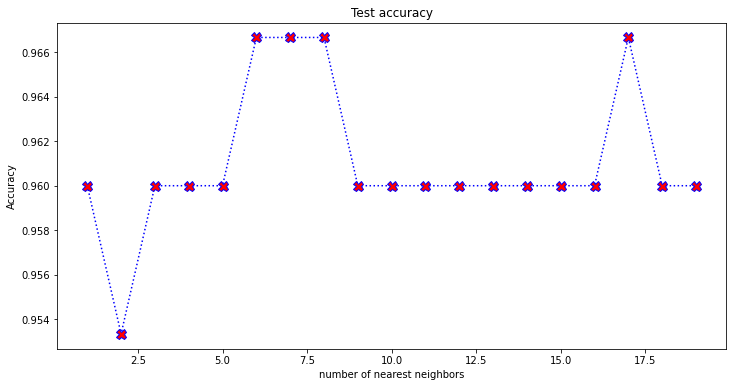

In [64]:
#plot test accuracy vs. number of nearest neighbors
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), accuracy, color='blue', linestyle=':', marker='X',
         markerfacecolor='red', markersize=10)
plt.title('Test accuracy')
plt.xlabel('number of nearest neighbors')
plt.ylabel('Accuracy');